In [ ]:
# import numpy as np
# from scipy.integrate import cumtrapz

# # Load the data (assuming it's in a file named 'data_speed_of_sound.txt')
# # For this example, we'll hardcode a few lines, but typically use np.loadtxt
# data = np.loadtxt("data_speed_of_sound")
# # Extract pressure and speed of sound squared
# p = data[:, 0]  # Pressure in dyn/cm²
# cs2 = data[:, 2]  # Speed of sound squared (dimensionless)

# # Verify that p is sorted in ascending order; sort if necessary
# if not np.all(p[:-1] <= p[1:]):
#     sorted_indices = np.argsort(p)
#     p = p[sorted_indices]
#     cs2 = cs2[sorted_indices]

# # Compute the integrand: 1 / c_s^2
# inv_cs2 = 1 / cs2

# # Compute the cumulative integral to get epsilon, starting with epsilon(p_0) = 0
# epsilon = cumtrapz(inv_cs2, p, initial=2.6495123e35)
# #epsilon = quad(inv_cs2, mu_1, mu)
# # Pair the results with pressure for convenience (optional)
# results = np.column_stack((p, epsilon))

# # Print or save the results (for demonstration, we'll print the first few and last few)
# print("Pressure (dyn/cm²)    Energy Density (erg/cm³)")
# for i in range(min(3, len(p))):
#     print(f"{p[i]:.6e}           {epsilon[i]:.6e}")
# if len(p) > 6:
#     print("...")
#     for i in range(-3, 0):
#         print(f"{p[i]:.6e}           {epsilon[i]:.6e}")

# # Optionally, save to a file
# # np.savetxt("energy_density.txt", results, fmt="%.6e", header="Pressure (dyn/cm²)   Energy Density (erg/cm³)")

In [ ]:
print(results[:,1]/(8.98749e20))

In [2]:
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import CubicSpline

# Load the data
data = np.loadtxt("data_speed_of_sound")

# Extract pressure and cs²
p = data[:, 0]  # Pressure in dyn/cm²
cs2 = data[:, 2]  # Speed of sound squared (dimensionless)

# Sort by pressure to ensure monotonicity
sorted_indices = np.argsort(p)
p = p[sorted_indices]
cs2 = cs2[sorted_indices]

# Interpolate cs² as a function of p using cubic spline
cs2_interp = CubicSpline(p, cs2)

# Define the integrand function: 1/cs²(p)
def integrand(p_val):
    return 1 / cs2_interp(p_val)

# Initialize epsilon with the given initial energy density at p0
epsilon_0 = 2.649512e35  # Initial energy density in erg/cm³
epsilon = np.zeros_like(p)
epsilon[0] = epsilon_0

# Compute cumulative energy density using quad and add initial epsilon
for i in range(1, len(p)):
    epsilon[i], _ = quad(integrand, p[0], p[i])
    epsilon[i] += epsilon_0

# Create a 2D array with pressure, energy density, and cs²
result_array = np.column_stack((p, epsilon, cs2))

# Print first few and last few rows for verification
print("Pressure (dyn/cm²)    Energy Density (erg/cm³)    cs² (dimensionless)")
for i in range(min(3, len(p))):
    print(f"{result_array[i, 0]:.6e}           {result_array[i, 1]:.6e}           {result_array[i, 2]:.6e}")
if len(p) > 6:
    print("...")
    for i in range(-3, 0):
        print(f"{result_array[i, 0]:.6e}           {result_array[i, 1]:.6e}           {result_array[i, 2]:.6e}")

# Save the results to a file
np.savetxt("pressure_density_cs2.txt", result_array, fmt="%.6e", 
           header="Pressure (dyn/cm²)   Energy Density (erg/cm³)   cs² (dimensionless)")

Pressure (dyn/cm²)    Energy Density (erg/cm³)    cs² (dimensionless)
3.332576e+33           2.649512e+35           1.044316e-01
8.484283e+33           3.127360e+35           1.110832e-01
1.451932e+34           3.654608e+35           1.177347e-01
...
6.720997e+36           1.689843e+37           5.351247e-01
6.889745e+36           1.721236e+37           5.399658e-01
7.060710e+36           1.752756e+37           5.448068e-01


In [4]:
print(result_array)

[[3.33257600e+33 2.64951200e+35 1.04431600e-01]
 [8.48428300e+33 3.12736013e+35 1.11083200e-01]
 [1.45193200e+34 3.65460843e+35 1.17734700e-01]
 [2.15082100e+34 4.23168641e+35 1.24386300e-01]
 [2.95195500e+34 4.85876458e+35 1.31037800e-01]
 [3.86198200e+34 5.53584482e+35 1.37689400e-01]
 [4.88731600e+34 6.26275774e+35 1.44340900e-01]
 [6.03412300e+34 7.03919056e+35 1.50992500e-01]
 [7.30831700e+34 7.86470697e+35 1.57644000e-01]
 [8.71554500e+34 8.73875912e+35 1.64295600e-01]
 [1.02611900e+35 9.66070625e+35 1.70947200e-01]
 [1.19503700e+35 1.06298297e+36 1.77598700e-01]
 [1.37879400e+35 1.16453442e+36 1.84250300e-01]
 [1.57784800e+35 1.27064016e+36 1.90901800e-01]
 [1.79263200e+35 1.38121119e+36 1.97553400e-01]
 [2.02355400e+35 1.49615492e+36 2.04204900e-01]
 [2.27099500e+35 1.61537464e+36 2.10856500e-01]
 [2.53531500e+35 1.73877286e+36 2.17508000e-01]
 [2.81684900e+35 1.86624956e+36 2.24159600e-01]
 [3.11590800e+35 1.99770292e+36 2.30811200e-01]
 [3.43278300e+35 2.13303132e+36 2.374627

In [6]:
data_1 = np.loadtxt("Full_EOS_with_cs2.txt")
# Slice rows 2 to 1085 (inclusive) and all three columns
sliced_data_1 = data_1[0:1084, :]
pres_sliced = sliced_data_1[:,0]
eps_sliced = sliced_data_1[:,1]
cs2_sliced = sliced_data_1[:,2]


In [8]:
print(sliced_data_1)
print(pres_sliced)
print(eps_sliced)
print(cs2_sliced)

[[9.539300e+18 1.031700e+04          nan]
 [5.337900e+20 1.047100e+05          nan]
 [2.324100e+22 1.045700e+06          nan]
 ...
 [3.179950e+33 2.882020e+14          nan]
 [3.234094e+33 2.904901e+14          nan]
 [3.289160e+33 2.927963e+14          nan]]
[9.539300e+18 5.337900e+20 2.324100e+22 ... 3.179950e+33 3.234094e+33
 3.289160e+33]
[1.031700e+04 1.047100e+05 1.045700e+06 ... 2.882020e+14 2.904901e+14
 2.927963e+14]
[nan nan nan ... nan nan nan]


In [10]:
pres_total = np.hstack((pres_sliced,p))

In [12]:
print(pres_total)

[9.539300e+18 5.337900e+20 2.324100e+22 ... 6.720997e+36 6.889745e+36
 7.060710e+36]


In [14]:
eps_total = np.hstack((eps_sliced,result_array[:,1]/(8.98749e20)))

In [16]:
print(eps_total)

[1.03170000e+04 1.04710000e+05 1.04570000e+06 ... 1.88021645e+16
 1.91514662e+16 1.95021710e+16]


In [18]:
cs2_total = np.hstack((cs2_sliced,cs2))

In [20]:
print(cs2_total)

[      nan       nan       nan ... 0.5351247 0.5399658 0.5448068]


In [22]:
NEW_EOS = np.column_stack(( pres_total,eps_total,cs2_total  ))
np.savetxt("NEW EOS.txt", NEW_EOS,  fmt="%.6e")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


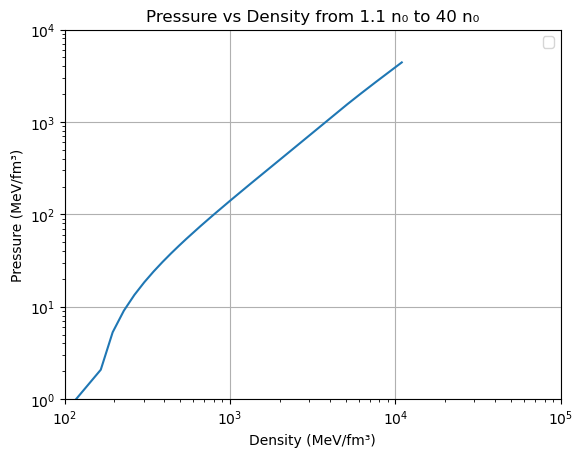

In [24]:
import matplotlib.pyplot as plt
# Plotting
plt.plot( eps_total/(1.7827e12),pres_total/1.6022e33)
plt.xlabel('Density (MeV/fm³)')
plt.ylabel('Pressure (MeV/fm³)')
plt.title('Pressure vs Density from 1.1 n₀ to 40 n₀')
plt.xscale("log")
plt.yscale("log")
plt.xlim([10**2,10**5])
plt.ylim([10**0,10**4])
plt.grid(True)
plt.legend()
plt.show()

In [26]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.RMF_EOS as RMF
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.Strangeon_EOS as Strangeon
import TOVsolver.main as main
import matplotlib.pyplot as plt
import numpy as np
import math
from TOVsolver.unit import g_cm_3, dyn_cm_2, km, Msun, MeV, fm

In [28]:
EOS = np.loadtxt("NEW EOS.txt")

eps_speed_of_sound= EOS[:,1] * g_cm_3
pres_speed_of_sound =EOS[:,0] *dyn_cm_2

MR_EOS = main.OutputMR("",eps_speed_of_sound,pres_speed_of_sound).T
MRT_EOS = main.OutputMRT("",eps_speed_of_sound,pres_speed_of_sound).T

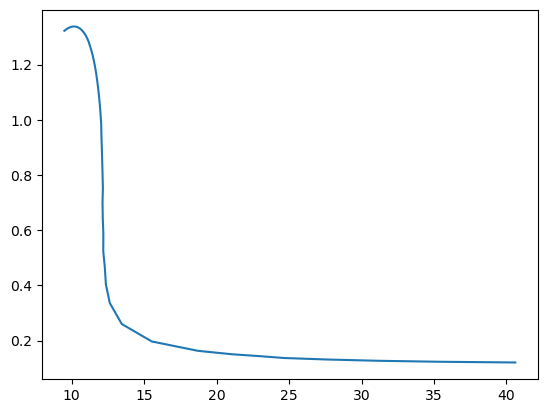

In [30]:
plt.plot(MR_EOS[1]/km,MR_EOS[0]/Msun)
plt.show()

In [32]:
print(MR_EOS[1]/km)

[40.61127543 35.35694615 31.11147381 27.61982322 24.63465334 23.06627194
 21.06310083 18.72223339 15.52727614 13.45803712 12.6297266  12.36344422
 12.29178891 12.18146682 12.18914604 12.14646514 12.13094584 12.15566037
 12.13225843 12.10668437 12.08164011 12.0543924  12.04267835 11.99713035
 11.94381847 11.88523423 11.8220278  11.75445652 11.68242536 11.60637424
 11.52609802 11.44131161 11.35267952 11.26040437 11.17848195 11.07932873
 10.9774252  10.87311767 10.76652257 10.65784059 10.5472989  10.43511388
 10.32148677 10.20659249 10.09061779  9.97371406  9.85601732  9.73767545
  9.61887418  9.49981829]


In [34]:
print(MR_EOS[0]/Msun)

[0.12088303 0.12347779 0.12709167 0.13166017 0.13711829 0.14346275
 0.15065026 0.16302216 0.19700024 0.26026005 0.33644632 0.40329505
 0.46361158 0.52394053 0.58482562 0.64406913 0.70032068 0.75370125
 0.80458683 0.85288045 0.898482   0.94135696 0.98160277 1.01926873
 1.05437671 1.08701115 1.11723944 1.14514519 1.17079649 1.19427019
 1.21565068 1.23500757 1.25243789 1.26801069 1.28180389 1.29389199
 1.30434805 1.31324361 1.32065601 1.32664935 1.33128819 1.33463731
 1.33676021 1.33771701 1.33756781 1.33636904 1.33417475 1.33103941
 1.32701297 1.32214578]
